In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from scipy import stats

from astropy.time import Time
from gatspy.periodic import LombScargleFast

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
f1 = pd.read_table('neowiser.neowiser_p1bs_psd20829.tbl.txt', delim_whitespace=True, header=None, skiprows=96)
f2 = pd.read_table('wise_allsky.allsky_4band_p1bs_psd20811.tbl.txt', delim_whitespace=True, header=None, skiprows=102)
f3 = pd.read_table('wise_allsky.allsky_2band_p1bs_psd20821.tbl.txt', delim_whitespace=True, header=None, skiprows=78)


(10.6, 10.3)

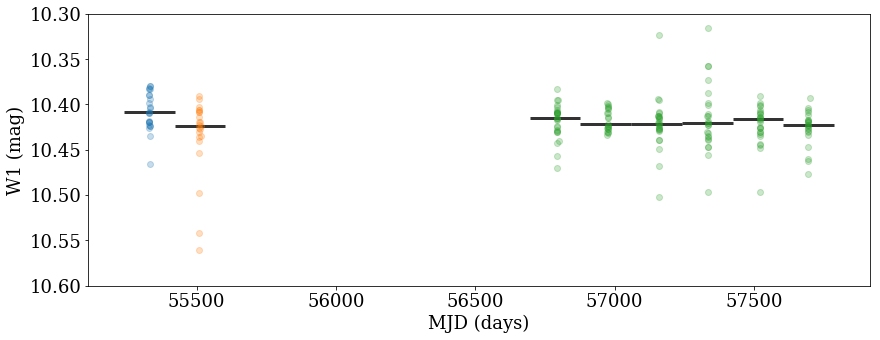

In [4]:
plt.figure(figsize=(14,5))
# plt.errorbar(f1[20], f1[7], yerr=f1[8], alpha=0.25, marker='.', linestyle='none')
plt.plot(f2[32], f2[7], 'o', alpha=0.25)
plt.plot(f3[20], f3[7], 'o', alpha=0.25)
plt.plot(f1[20], f1[7], 'o', alpha=0.25)


tt = np.hstack([f1[20].values,f2[32].values,f3[20].values])
ff = np.hstack([f1[7].values,f2[7].values,f3[7].values])
ee = np.hstack([f1[8].values,f2[8].values,f3[8].values])

bin_means, bin_edges, binnumber = stats.binned_statistic(tt, ff, statistic='median', 
                                                         bins=np.arange(min(tt)-91, max(tt)+200, 182))
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], lw=3, alpha=0.8)

# plt.errorbar(56000, 10.4, yerr=np.median(ee), capsize=10)

plt.xlabel('MJD (days)')
plt.ylabel('W1 (mag)')

plt.ylim(10.6,10.3)

# plt.savefig('W1_all_v1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

1.02516897505
(55329.909207000004, 55508.948011)


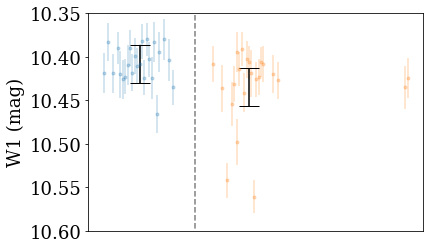

In [7]:
plt.errorbar(f2[32]-min(f2[32]), f2[7], yerr=f2[8], alpha=0.25, marker='.', linestyle='none')
plt.errorbar(f3[20]-min(f3[20]) + 3, f3[7], yerr=f3[8], alpha=0.25, marker='.', linestyle='none')

plt.ylim(10.6,10.35)
plt.errorbar(1, np.mean(f2[7]), yerr=np.sqrt(np.sum(f2[8]**2))/np.sqrt(len(f2)), capsize=10, c='k')
plt.errorbar(4, np.mean(f3[7]), yerr=np.sqrt(np.sum(f3[8]**2))/np.sqrt(len(f3)), capsize=10, c='k')

plt.plot([2.5,2.5],[0,100], c='grey', linestyle='--')
plt.xticks([])
plt.ylabel('W1 (mag)')
plt.savefig('W1_zoom.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

print(10**((np.mean(f2[7]) - np.mean(f3[7])) / (-2.5)))

print(min(f2[32]), min(f3[20]))

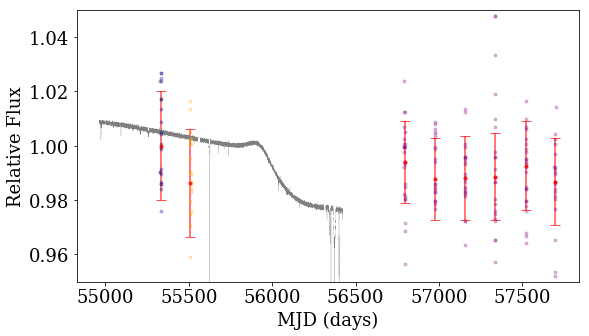

In [55]:
plt.figure(figsize=(9,5))
df = pd.read_table('reduced_lc.txt', delim_whitespace=True, skiprows=1, 
                   names=('time','raw_flux', 'norm_flux', 'model_flux'))

plt.plot(df['time'] + 2454833 - 2400000.5, df['model_flux'], c='grey', lw=0.2)

Wflux = np.array([1, 10**((np.median(f3[7]) - np.median(f2[7])) / (-2.5))])

Wtime = [np.median(f2[32]), np.median(f3[20])]

Werr_mag = [np.sqrt(np.sum(f2[8]**2))/np.sqrt(len(f2)), 
            np.sqrt(np.sum(f3[8]**2))/np.sqrt(len(f3))]
# Werr_mag = [np.std(f2[7]), np.std(f3[7])]

Werr = np.abs(np.array(Werr_mag) * np.log(10) / (-2.5) * Wflux)

plt.plot(f2[32], 10.**((f2[7] - np.median(f2[7])) / (-2.5)), alpha=0.25, marker='.', linestyle='none', c='navy');
plt.plot(f3[20], 10.**((f3[7] - np.median(f2[7])) / (-2.5)), alpha=0.25, marker='.', linestyle='none', c='Orange');

plt.errorbar(Wtime, Wflux, yerr=Werr, color='r', marker='.', linestyle='none', capsize=5, alpha=0.7);


plt.plot(f1[20], 10.**((f1[7] - np.median(f2[7])) / (-2.5)), '.', alpha=0.25, c='purple')

neo_visits = [[56700, 56800],
              [56900, 57000],
              [57100, 57200],
              [57300, 57400],
              [57500, 57600],
              [57600, 57800]]

for j in range(np.shape(neo_visits)[0]):
    visit_j = np.where((f1[20] >= neo_visits[j][0]) & 
                       (f1[20] <= neo_visits[j][1]))[0]
    Wtime_j = np.median(f1[20][visit_j])
    
    Wflux_j = 10**((np.median(f1[7][visit_j]) - np.median(f2[7])) / (-2.5))
    Werr_mag_j = np.sqrt(np.sum(f1[8][visit_j]**2))/np.sqrt(len(visit_j))
#     Werr_mag_j = np.std(f1[7][visit_j])
    
    Werr_j = np.abs(np.array(Werr_mag_j) * np.log(10) / (-2.5) * Wflux_j)
    
    plt.errorbar(Wtime_j, Wflux_j, yerr=Werr_j, color='r', marker='.', linestyle='none', capsize=5, alpha=0.7);

plt.xlabel('MJD (days)')
plt.ylabel('Relative Flux')

plt.ylim(0.95,1.05)
plt.savefig('W1_relflux.png', dpi=150, bbox_inches='tight', pad_inches=0.25)



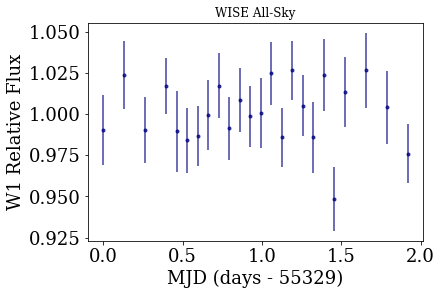

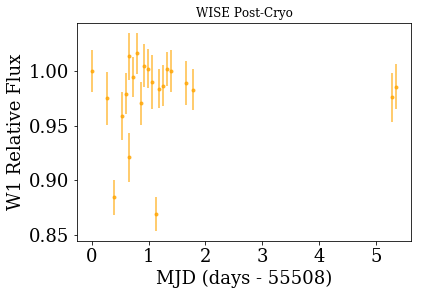

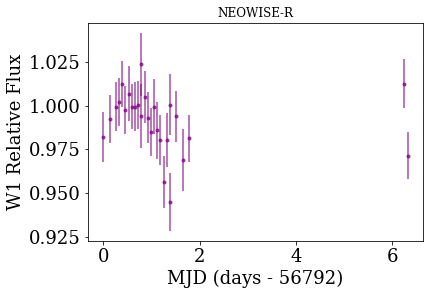

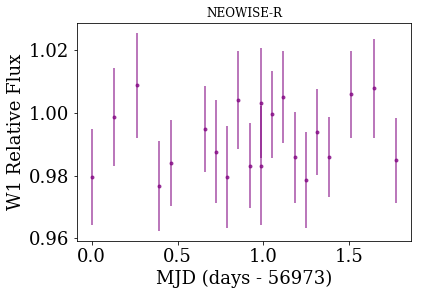

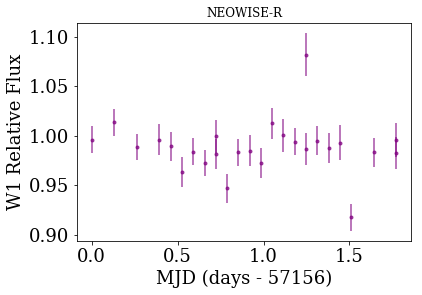

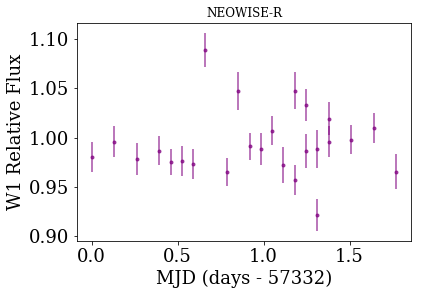

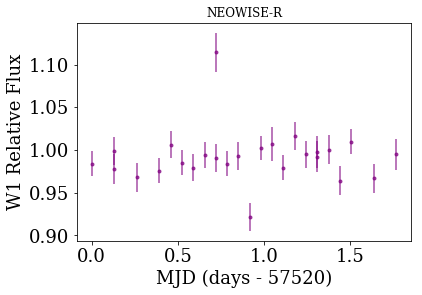

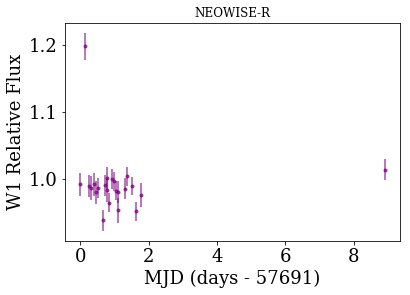

In [82]:
### now go through and make zoom-in plots like Riley did!
plt.figure()
plt.errorbar(f2[32] - (min(f2[32])), 10.**((f2[7] - np.median(f2[7])) / (-2.5)), 
             yerr=np.abs(np.array(f2[8]) * np.log(10) / (-2.5) * 10.**((f2[7] - np.median(f2[7])) / (-2.5))),
             alpha=0.75, marker='.', linestyle='none', c='navy');
# plt.plot(df['time'] + 2454833 - 2400000.5 - int(min(f2[32])), df['model_flux'], c='grey', lw=0.2, 
#          scaley=False, scalex=False)
plt.xlabel('MJD (days - '+str(int(min(f2[32])))+')')
plt.ylabel('W1 Relative Flux')
plt.title('WISE All-Sky', fontsize=12)
plt.savefig('lc_1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)
plt.show()


plt.figure()
plt.errorbar(f3[20] - (min(f3[20])), 10.**((f3[7] - np.median(f2[7])) / (-2.5)),
             yerr=np.abs(np.array(f3[8]) * np.log(10) / (-2.5) * 10.**((f3[7] - np.median(f2[7])) / (-2.5))),
             alpha=0.75, marker='.', linestyle='none', c='Orange');
# plt.plot(df['time'] + 2454833 - 2400000.5 - int(min(f3[10])), df['model_flux'], c='grey', lw=0.2, 
#          scaley=False, scalex=False)
plt.xlabel('MJD (days - '+str(int(min(f3[20])))+')')
plt.ylabel('W1 Relative Flux')
plt.title('WISE Post-Cryo', fontsize=12)
plt.savefig('lc_2.png', dpi=150, bbox_inches='tight', pad_inches=0.25)
plt.show()


for j in range(np.shape(neo_visits)[0]):
    visit_j = np.where((f1[20] >= neo_visits[j][0]) & 
                       (f1[20] <= neo_visits[j][1]))[0]
    Wtime_j = f1[20][visit_j] - (min(f1[20][visit_j]))
    
    Wflux_j = 10**(((f1[7][visit_j]) - np.median(f2[7])) / (-2.5))
    Werr_mag_j = f1[8][visit_j]
    Werr_j = np.abs(np.array(Werr_mag_j) * np.log(10) / (-2.5) * Wflux_j)
    
    
    plt.figure()
    plt.errorbar(Wtime_j, Wflux_j, yerr=Werr_j, color='purple', marker='.', linestyle='none', alpha=0.7);
    plt.xlabel('MJD (days - '+str(int(min(f1[20][visit_j])))+')')
    plt.ylabel('W1 Relative Flux')
    plt.title('NEOWISE-R', fontsize=12)
    plt.savefig('lc_3_'+str(j+1)+'.png', dpi=150, bbox_inches='tight', pad_inches=0.25)
    plt.show()


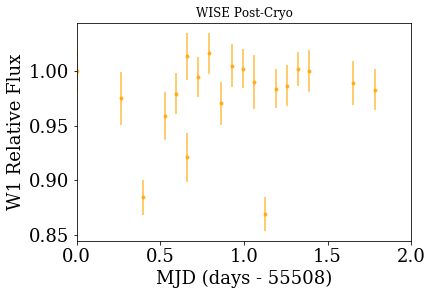

In [86]:
plt.figure()
plt.errorbar(f3[20] - (min(f3[20])), 10.**((f3[7] - np.median(f2[7])) / (-2.5)),
             yerr=np.abs(np.array(f3[8]) * np.log(10) / (-2.5) * 10.**((f3[7] - np.median(f2[7])) / (-2.5))),
             alpha=0.75, marker='.', linestyle='none', c='Orange');
# plt.plot(df['time'] + 2454833 - 2400000.5 - int(min(f3[10])), df['model_flux'], c='grey', lw=0.2, 
#          scaley=False, scalex=False)
plt.xlabel('MJD (days - '+str(int(min(f3[20])))+')')
plt.ylabel('W1 Relative Flux')
plt.title('WISE Post-Cryo', fontsize=12)
plt.xlim(0,2)
# plt.savefig('lc_2b.png', dpi=150, bbox_inches='tight', pad_inches=0.25)
plt.show()



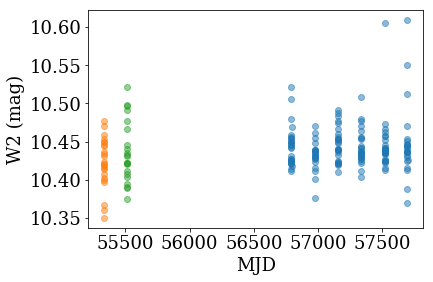

In [43]:
plt.plot(f1[20], f1[11], 'o', alpha=0.5)
plt.plot(f2[32], f2[11], 'o', alpha=0.5)
plt.plot(f3[20], f3[11], 'o', alpha=0.5)

plt.xlabel('MJD')
plt.ylabel('W2 (mag)')

# plt.ylim(10.5,10.3)

(-0.1, 0.1)

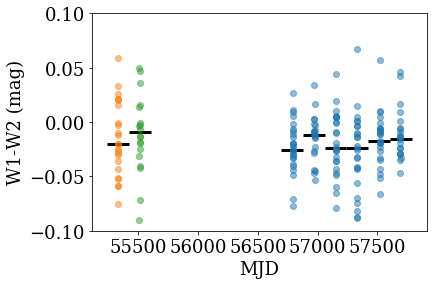

In [44]:
plt.plot(f1[20], f1[7]-f1[11], 'o', alpha=0.5)
plt.plot(f2[32], f2[7]-f2[11], 'o', alpha=0.5)
plt.plot(f3[20], f3[7]-f3[11], 'o', alpha=0.5)

tt = np.hstack([f1[20].values,f2[32].values,f3[20].values])
ff = np.hstack([f1[7].values-f1[11].values,f2[7].values-f2[11].values,f3[7].values-f3[11].values])

bin_means, bin_edges, binnumber = stats.binned_statistic(tt, ff, statistic='median', 
                                                         bins=np.arange(min(tt)-91, max(tt)+200, 182))
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], lw=3)

plt.xlabel('MJD')
plt.ylabel('W1-W2 (mag)')

plt.ylim(-0.1, 0.1)

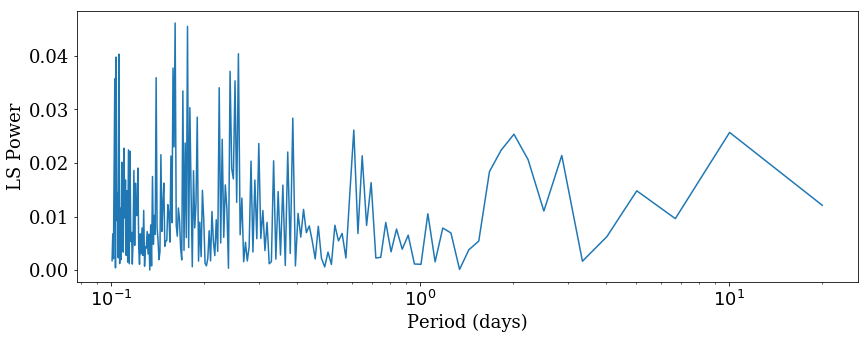

In [46]:
minper = 0.1 # my windowing
maxper = 20
nper = 200
pgram = LombScargleFast(fit_offset=False)
pgram.optimizer.set(period_range=(minper,maxper))

pgram = pgram.fit(tt - min(tt), ff - np.nanmedian(ff))

df = (1./minper - 1./maxper) / nper
f0 = 1./maxper

pwr = pgram.score_frequency_grid(f0, df, nper)

freq = f0 + df * np.arange(nper)
per = 1./freq

##
plt.figure(figsize=(14,5))
plt.plot(per, pwr)
plt.xlabel('Period (days)')
plt.ylabel('LS Power')
plt.xscale('log')
# plt.xlim(10,500)